In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test) =keras.datasets.mnist.load_data()
x_train=x_train/255
x_test=x_test/255
print(len(x_train))
print(len(x_test))
x_train[0]

11490434/11490434 [==============================] - 2s 0us/step
60000
10000


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

0


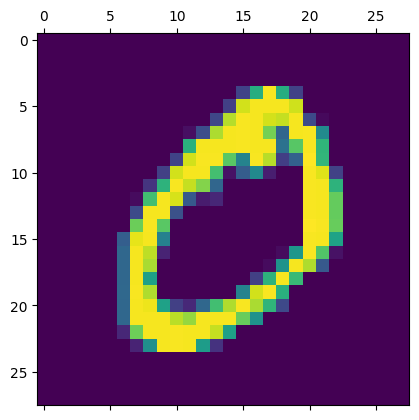

In [3]:
plt.matshow(x_train[1])
print(y_train[1])


In [7]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [15]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 413us/step - loss: 0.4660 - accuracy: 0.8786
Epoch 2/10
1875/1875 [==============================] - 1s 412us/step - loss: 0.3033 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 1s 414us/step - loss: 0.2831 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 1s 424us/step - loss: 0.2727 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 1s 398us/step - loss: 0.2664 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 1s 418us/step - loss: 0.2615 - accuracy: 0.9281
Epoch 7/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.2583 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 1s 407us/step - loss: 0.2555 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 1s 408us/step - loss: 0.2529 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 1s 441u

In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 399us/step - loss: 0.2641 - accuracy: 0.9276


[0.2641349732875824, 0.9276000261306763]

313/313 [==============================] - 0s 311us/step
[4.4159550e-02 1.1955483e-05 1.5239584e-01 1.9516180e-03 9.9053031e-01
 6.7622010e-03 1.3450073e-01 1.9393022e-01 2.3536929e-01 6.9648784e-01]
4


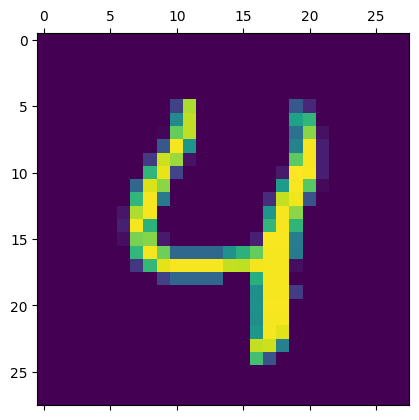

In [18]:
plt.matshow(x_test[4])
y_predicted=model.predict(x_test_flattened)
print(y_predicted[4])
print(np.argmax(y_predicted[4]))

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:10])
print(y_test[:10])



[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7 2 1 0 4 1 4 9 5 9]


In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm